### Task:
Using the functional API:
1. Choose 4 hyperparameters
2. Create lists of the different options of hyperparameters
3. Randomly sample from those lists and train a Keras model on Fashion - MNIST and train 10 different models
4. Display the different loss and accuracy curves using matplotlib
5. Print hyperparameters of the best model
** Train at least 10 different models

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import random

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. # convert inputs into float, standardizes them
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

In [ ]:
X_train.shape[1:]

(28, 28)

In [ ]:
leaky_relu = keras.layers.LeakyReLU(alpha=0.2)
pre_lu = keras.layers.PReLU()


In [ ]:
kernel_initializer = ['he_normal', 'lecun_normal', 'glorot_uniform']
activation_function = ['selu', 'relu', 'sigmoid']
optimizer = [keras.optimizers.SGD(lr = 0.001, momentum = 0.9),#momentum 
             keras.optimizers.SGD(lr = 0.001, momentum = 0.9, nesterov = True), #Nesterov accelerated gradient
             keras.optimizers.Adagrad(lr = 0.001), # Adagrad
             keras.optimizers.RMSprop(lr = 0.001, rho = 0.9), #RMSProp
             keras.optimizers.Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999), # Adam
             keras.optimizers.Adamax(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999), #Adamax
             keras.optimizers.Nadam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999), # Nadam
             keras.optimizers.SGD()]

regularizer = [keras.regularizers.l1(0.01), keras.regularizers.l2(0.01)]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)
/usr/local/lib/pytho

In [ ]:
ke = random.choice(kernel_initializer)
af = random.choice(activation_function)
op = random.choice(optimizer)
re = random.choice(regularizer)

print('Initializer: ', ke)
print('Activation function: ', af)
print('Optimizer: ', op)
print('Regularizer', re)

input_ = keras.layers.Input(shape = X_train.shape[1:])
flatten = keras.layers.Flatten()(input_)
hidden1 = keras.layers.Dense(300, activation = af, kernel_initializer = ke, kernel_regularizer = re)(flatten)
hidden2 = keras.layers.Dense(100, activation = af, kernel_initializer = ke, kernel_regularizer = re)(hidden1)
concat = keras.layers.concatenate([flatten, hidden2])
output = keras.layers.Dense(10, activation = 'softmax')(concat) # softmax activation because classes are exclusive
# 10 output neurons corresponding to 10 image classes

model = keras.models.Model(inputs = [input_], outputs = [output])

model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = op, 
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Initializer:  lecun_normal
Activation function:  sigmoid
Optimizer:  <keras.optimizer_v2.adam.Adam object at 0x7f1dbeb9a310>
Regularizer <keras.regularizers.L1 object at 0x7f1d3e17cd90>
Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 2.1446 - accuracy: 0.7983 - val_loss: 0.7842 - val_accuracy: 0.8456
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7795 - accuracy: 0.8403 - val_loss: 0.7596 - val_accuracy: 0.8518
Epoch 3/10
1279/1719 [=====================>........] - ETA: 2s - loss: 0.7558 - accuracy: 0.8489

KeyboardInterrupt: ignored

Initializer:  glorot_uniform
Activation function:  relu
Optimizer:  <keras.optimizer_v2.nadam.Nadam object at 0x7fbede952890>
Regularizer <keras.regularizers.L2 object at 0x7fbedc8f6450>
Epoch 1/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.7869 - accuracy: 0.8022 - val_loss: 0.4766 - val_accuracy: 0.8360
Epoch 2/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4532 - accuracy: 0.8443 - val_loss: 0.4287 - val_accuracy: 0.8550
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4298 - accuracy: 0.8505 - val_loss: 0.4213 - val_accuracy: 0.8582
Epoch 4/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4170 - accuracy: 0.8554 - val_loss: 0.4169 - val_accuracy: 0.8518
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4080 - accuracy: 0.8581 - val_loss: 0.4178 - val_accuracy: 0.8586
Epoch 6/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4030 - ac

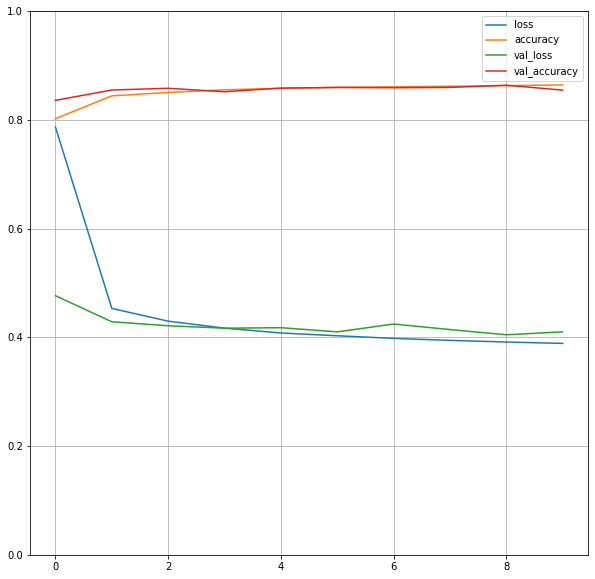

In [ ]:
ke = random.choice(kernel_initializer)
af = random.choice(activation_function)
op = random.choice(optimizer)
re = random.choice(regularizer)

print('Initializer: ', ke)
print('Activation function: ', af)
print('Optimizer: ', op)
print('Regularizer', re)

input_ = keras.layers.Input(shape = X_train.shape[1:])
flatten = keras.layers.Flatten()(input_)
hidden1 = keras.layers.Dense(300, activation = af, kernel_initializer = ke, kernel_regularizer = re)(flatten)
hidden2 = keras.layers.Dense(100, activation = af, kernel_initializer = ke, kernel_regularizer = re)(hidden1)
concat = keras.layers.concatenate([flatten, hidden2])
output = keras.layers.Dense(10, activation = 'softmax')(concat) # softmax activation because classes are exclusive
# 10 output neurons corresponding to 10 image classes

model = keras.models.Model(inputs = [input_], outputs = [output])

model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = op, 
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Initializer:  glorot_uniform
Activation function:  relu
Optimizer:  <keras.optimizer_v2.gradient_descent.SGD object at 0x7fbedd1230d0>
Regularizer <keras.regularizers.L2 object at 0x7fbedc8f6450>
Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 5.0591 - accuracy: 0.7395 - val_loss: 3.5724 - val_accuracy: 0.8076
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 2.7340 - accuracy: 0.8123 - val_loss: 2.0480 - val_accuracy: 0.8246
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 1.6304 - accuracy: 0.8230 - val_loss: 1.2776 - val_accuracy: 0.8366
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 1.0709 - accuracy: 0.8300 - val_loss: 0.8884 - val_accuracy: 0.8390
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7835 - accuracy: 0.8335 - val_loss: 0.6862 - val_accuracy: 0.8430
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6338 -

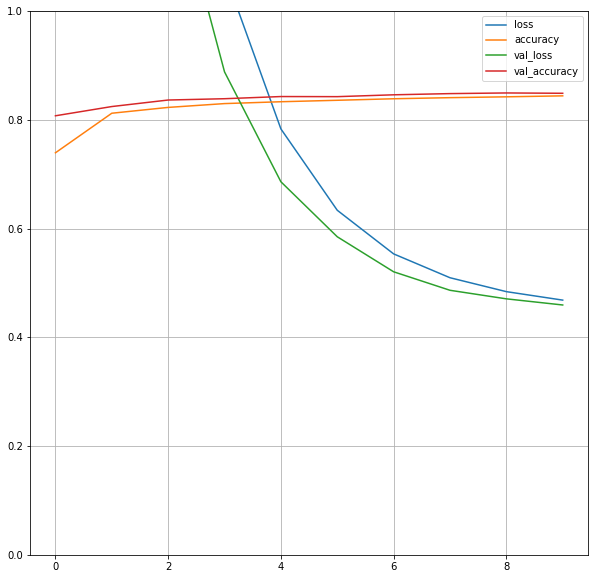

In [ ]:
ke = random.choice(kernel_initializer)
af = random.choice(activation_function)
op = random.choice(optimizer)
re = random.choice(regularizer)

print('Initializer: ', ke)
print('Activation function: ', af)
print('Optimizer: ', op)
print('Regularizer', re)

input_ = keras.layers.Input(shape = X_train.shape[1:])
flatten = keras.layers.Flatten()(input_)
hidden1 = keras.layers.Dense(300, activation = af, kernel_initializer = ke, kernel_regularizer = re)(flatten)
hidden2 = keras.layers.Dense(100, activation = af, kernel_initializer = ke, kernel_regularizer = re)(hidden1)
concat = keras.layers.concatenate([flatten, hidden2])
output = keras.layers.Dense(10, activation = 'softmax')(concat) # softmax activation because classes are exclusive
# 10 output neurons corresponding to 10 image classes

model = keras.models.Model(inputs = [input_], outputs = [output])

model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = op, 
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Initializer:  glorot_uniform
Activation function:  relu
Optimizer:  <keras.optimizer_v2.adagrad.Adagrad object at 0x7fbedd595a90>
Regularizer <keras.regularizers.L2 object at 0x7fbedc8f6450>
Epoch 1/10
1719/1719 [==============================] - 10s 6ms/step - loss: 6.4479 - accuracy: 0.6513 - val_loss: 5.6260 - val_accuracy: 0.7220
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 5.1183 - accuracy: 0.7371 - val_loss: 4.6389 - val_accuracy: 0.7534
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 4.2636 - accuracy: 0.7604 - val_loss: 3.8963 - val_accuracy: 0.7740
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 3.6033 - accuracy: 0.7734 - val_loss: 3.3096 - val_accuracy: 0.7878
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 3.0789 - accuracy: 0.7836 - val_loss: 2.8424 - val_accuracy: 0.7906
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 2.6572 - ac

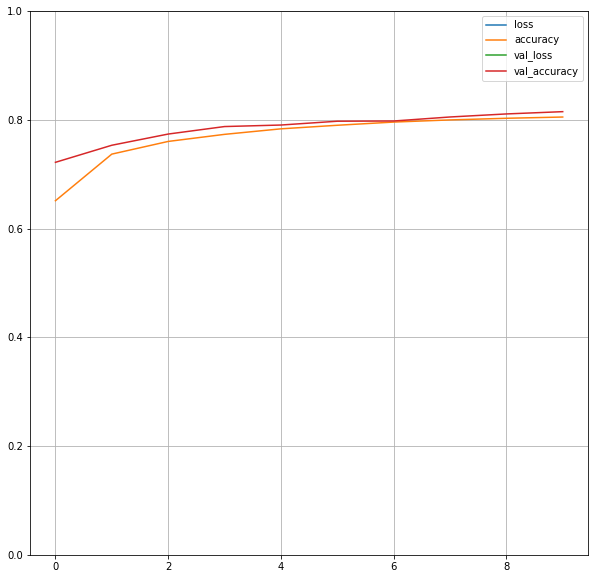

In [ ]:
ke = random.choice(kernel_initializer)
af = random.choice(activation_function)
op = random.choice(optimizer)
re = random.choice(regularizer)

print('Initializer: ', ke)
print('Activation function: ', af)
print('Optimizer: ', op)
print('Regularizer', re)

input_ = keras.layers.Input(shape = X_train.shape[1:])
flatten = keras.layers.Flatten()(input_)
hidden1 = keras.layers.Dense(300, activation = af, kernel_initializer = ke, kernel_regularizer = re)(flatten)
hidden2 = keras.layers.Dense(100, activation = af, kernel_initializer = ke, kernel_regularizer = re)(hidden1)
concat = keras.layers.concatenate([flatten, hidden2])
output = keras.layers.Dense(10, activation = 'softmax')(concat) # softmax activation because classes are exclusive
# 10 output neurons corresponding to 10 image classes

model = keras.models.Model(inputs = [input_], outputs = [output])

model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = op, 
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Initializer:  glorot_uniform
Activation function:  selu
Optimizer:  <keras.optimizer_v2.gradient_descent.SGD object at 0x7fbedc8e2f10>
Regularizer <keras.regularizers.L1 object at 0x7fbedd123110>
Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 18.0780 - accuracy: 0.7519 - val_loss: 0.7650 - val_accuracy: 0.8000
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7270 - accuracy: 0.8085 - val_loss: 0.6834 - val_accuracy: 0.8200
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6717 - accuracy: 0.8210 - val_loss: 0.6431 - val_accuracy: 0.8342
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6434 - accuracy: 0.8280 - val_loss: 0.6336 - val_accuracy: 0.8372
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6258 - accuracy: 0.8332 - val_loss: 0.6091 - val_accuracy: 0.8442
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6137 

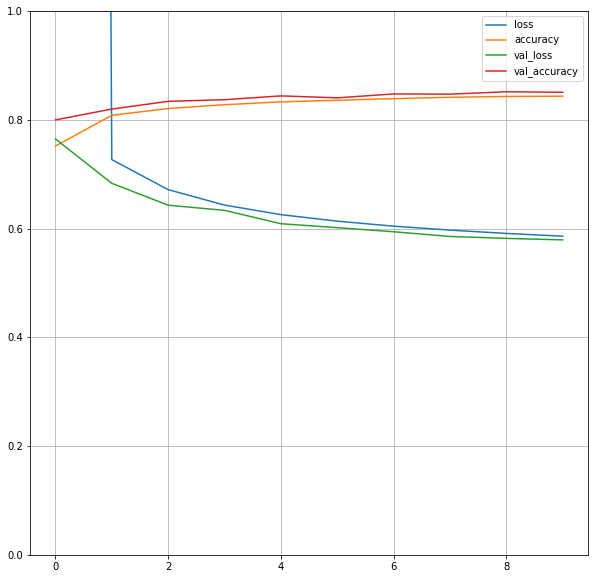

In [ ]:
ke = random.choice(kernel_initializer)
af = random.choice(activation_function)
op = random.choice(optimizer)
re = random.choice(regularizer)

print('Initializer: ', ke)
print('Activation function: ', af)
print('Optimizer: ', op)
print('Regularizer', re)

input_ = keras.layers.Input(shape = X_train.shape[1:])
flatten = keras.layers.Flatten()(input_)
hidden1 = keras.layers.Dense(300, activation = af, kernel_initializer = ke, kernel_regularizer = re)(flatten)
hidden2 = keras.layers.Dense(100, activation = af, kernel_initializer = ke, kernel_regularizer = re)(hidden1)
concat = keras.layers.concatenate([flatten, hidden2])
output = keras.layers.Dense(10, activation = 'softmax')(concat) # softmax activation because classes are exclusive
# 10 output neurons corresponding to 10 image classes

model = keras.models.Model(inputs = [input_], outputs = [output])

model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = op, 
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Initializer:  he_normal
Activation function:  sigmoid
Optimizer:  <keras.optimizer_v2.nadam.Nadam object at 0x7fbede952890>
Regularizer <keras.regularizers.L1 object at 0x7fbedd123110>
Epoch 1/10
1719/1719 [==============================] - 15s 8ms/step - loss: 1.3703 - accuracy: 0.8231 - val_loss: 0.7320 - val_accuracy: 0.8558
Epoch 2/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.7093 - accuracy: 0.8477 - val_loss: 0.6729 - val_accuracy: 0.8592
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.6785 - accuracy: 0.8535 - val_loss: 0.6773 - val_accuracy: 0.8586
Epoch 4/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.6647 - accuracy: 0.8558 - val_loss: 0.6611 - val_accuracy: 0.8560
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.6549 - accuracy: 0.8583 - val_loss: 0.6710 - val_accuracy: 0.8566
Epoch 6/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.6480 - accu

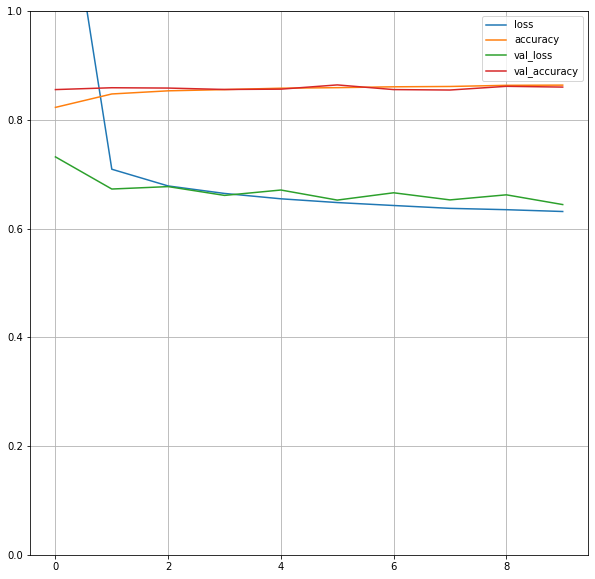

In [ ]:
ke = random.choice(kernel_initializer)
af = random.choice(activation_function)
op = random.choice(optimizer)
re = random.choice(regularizer)

print('Initializer: ', ke)
print('Activation function: ', af)
print('Optimizer: ', op)
print('Regularizer', re)

input_ = keras.layers.Input(shape = X_train.shape[1:])
flatten = keras.layers.Flatten()(input_)
hidden1 = keras.layers.Dense(300, activation = af, kernel_initializer = ke, kernel_regularizer = re)(flatten)
hidden2 = keras.layers.Dense(100, activation = af, kernel_initializer = ke, kernel_regularizer = re)(hidden1)
concat = keras.layers.concatenate([flatten, hidden2])
output = keras.layers.Dense(10, activation = 'softmax')(concat) # softmax activation because classes are exclusive
# 10 output neurons corresponding to 10 image classes

model = keras.models.Model(inputs = [input_], outputs = [output])

model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = op, 
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Initializer:  he_normal
Activation function:  selu
Optimizer:  <keras.optimizer_v2.gradient_descent.SGD object at 0x7fbed5ce7e50>
Regularizer <keras.regularizers.L2 object at 0x7fbed5ce7c10>
Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 6.5030 - accuracy: 0.7742 - val_loss: 4.5900 - val_accuracy: 0.8282
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 3.4752 - accuracy: 0.8281 - val_loss: 2.5612 - val_accuracy: 0.8418
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 2.0090 - accuracy: 0.8355 - val_loss: 1.5420 - val_accuracy: 0.8460
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 1.2702 - accuracy: 0.8397 - val_loss: 1.0277 - val_accuracy: 0.8518
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8950 - accuracy: 0.8422 - val_loss: 0.7879 - val_accuracy: 0.8362
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7039 - acc

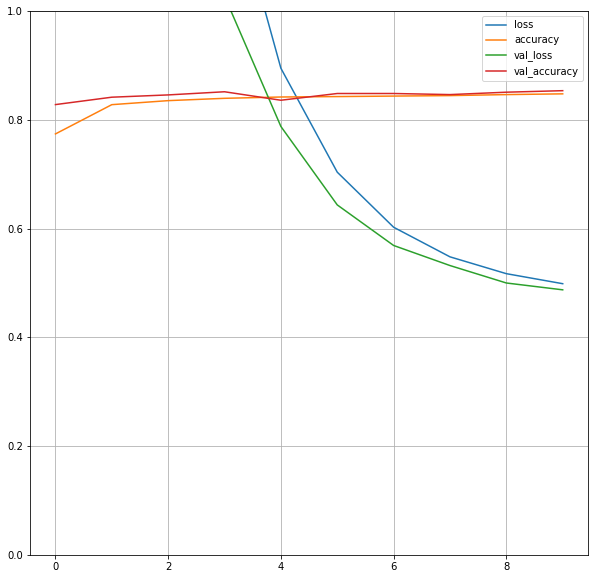

In [ ]:
ke = random.choice(kernel_initializer)
af = random.choice(activation_function)
op = random.choice(optimizer)
re = random.choice(regularizer)

print('Initializer: ', ke)
print('Activation function: ', af)
print('Optimizer: ', op)
print('Regularizer', re)

input_ = keras.layers.Input(shape = X_train.shape[1:])
flatten = keras.layers.Flatten()(input_)
hidden1 = keras.layers.Dense(300, activation = af, kernel_initializer = ke, kernel_regularizer = re)(flatten)
hidden2 = keras.layers.Dense(100, activation = af, kernel_initializer = ke, kernel_regularizer = re)(hidden1)
concat = keras.layers.concatenate([flatten, hidden2])
output = keras.layers.Dense(10, activation = 'softmax')(concat) # softmax activation because classes are exclusive
# 10 output neurons corresponding to 10 image classes

model = keras.models.Model(inputs = [input_], outputs = [output])

model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = op, 
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Initializer:  lecun_normal
Activation function:  sigmoid
Optimizer:  <keras.optimizer_v2.gradient_descent.SGD object at 0x7fbed5d01ad0>
Regularizer <keras.regularizers.L1 object at 0x7fbed5ce7e10>
Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 12.9123 - accuracy: 0.7428 - val_loss: 0.6234 - val_accuracy: 0.8010
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5998 - accuracy: 0.8054 - val_loss: 0.5621 - val_accuracy: 0.8194
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5554 - accuracy: 0.8176 - val_loss: 0.5312 - val_accuracy: 0.8338
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5319 - accuracy: 0.8247 - val_loss: 0.5126 - val_accuracy: 0.8350
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5161 - accuracy: 0.8295 - val_loss: 0.5082 - val_accuracy: 0.8410
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5

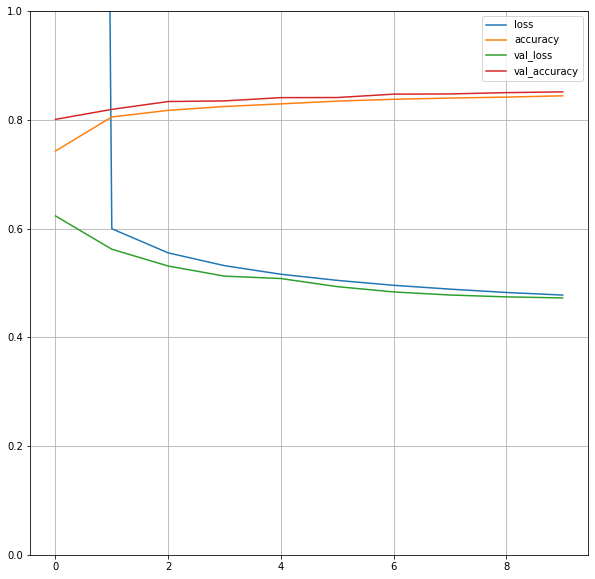

In [ ]:
ke = random.choice(kernel_initializer)
af = random.choice(activation_function)
op = random.choice(optimizer)
re = random.choice(regularizer)

print('Initializer: ', ke)
print('Activation function: ', af)
print('Optimizer: ', op)
print('Regularizer', re)

input_ = keras.layers.Input(shape = X_train.shape[1:])
flatten = keras.layers.Flatten()(input_)
hidden1 = keras.layers.Dense(300, activation = af, kernel_initializer = ke, kernel_regularizer = re)(flatten)
hidden2 = keras.layers.Dense(100, activation = af, kernel_initializer = ke, kernel_regularizer = re)(hidden1)
concat = keras.layers.concatenate([flatten, hidden2])
output = keras.layers.Dense(10, activation = 'softmax')(concat) # softmax activation because classes are exclusive
# 10 output neurons corresponding to 10 image classes

model = keras.models.Model(inputs = [input_], outputs = [output])

model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = op, 
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Initializer:  he_normal
Activation function:  relu
Optimizer:  <keras.optimizer_v2.adamax.Adamax object at 0x7fbed5ce7490>
Regularizer <keras.regularizers.L2 object at 0x7fbed5ce7c10>
Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 1.2691 - accuracy: 0.7847 - val_loss: 0.5886 - val_accuracy: 0.8220
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5454 - accuracy: 0.8233 - val_loss: 0.4970 - val_accuracy: 0.8364
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4899 - accuracy: 0.8345 - val_loss: 0.4673 - val_accuracy: 0.8412
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4653 - accuracy: 0.8410 - val_loss: 0.4485 - val_accuracy: 0.8498
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4494 - accuracy: 0.8449 - val_loss: 0.4393 - val_accuracy: 0.8516
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4395 - accur

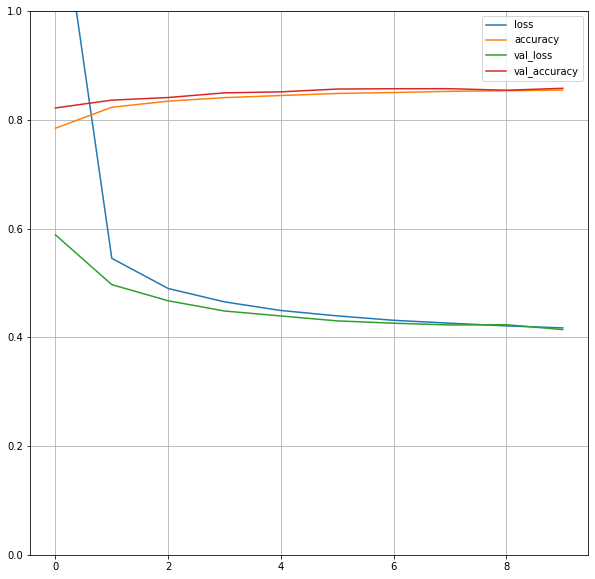

In [ ]:
ke = random.choice(kernel_initializer)
af = random.choice(activation_function)
op = random.choice(optimizer)
re = random.choice(regularizer)

print('Initializer: ', ke)
print('Activation function: ', af)
print('Optimizer: ', op)
print('Regularizer', re)

input_ = keras.layers.Input(shape = X_train.shape[1:])
flatten = keras.layers.Flatten()(input_)
hidden1 = keras.layers.Dense(300, activation = af, kernel_initializer = ke, kernel_regularizer = re)(flatten)
hidden2 = keras.layers.Dense(100, activation = af, kernel_initializer = ke, kernel_regularizer = re)(hidden1)
concat = keras.layers.concatenate([flatten, hidden2])
output = keras.layers.Dense(10, activation = 'softmax')(concat) # softmax activation because classes are exclusive
# 10 output neurons corresponding to 10 image classes

model = keras.models.Model(inputs = [input_], outputs = [output])

model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = op, 
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Initializer:  glorot_uniform
Activation function:  selu
Optimizer:  <keras.optimizer_v2.rmsprop.RMSprop object at 0x7fbed5ce7c90>
Regularizer <keras.regularizers.L2 object at 0x7fbed5ce7c10>
Epoch 1/10
1719/1719 [==============================] - 14s 7ms/step - loss: 0.8237 - accuracy: 0.7967 - val_loss: 0.4925 - val_accuracy: 0.8354
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4772 - accuracy: 0.8394 - val_loss: 0.4820 - val_accuracy: 0.8388
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4565 - accuracy: 0.8479 - val_loss: 0.4592 - val_accuracy: 0.8438
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4471 - accuracy: 0.8523 - val_loss: 0.4475 - val_accuracy: 0.8552
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4397 - accuracy: 0.8539 - val_loss: 0.4485 - val_accuracy: 0.8468
Epoch 6/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4347 

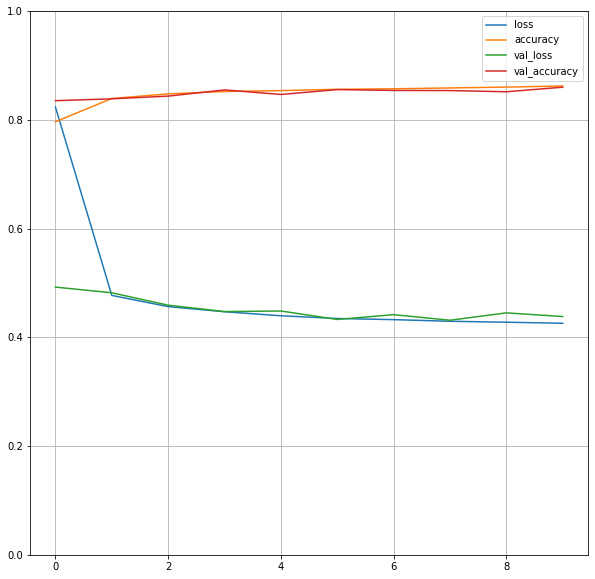

In [ ]:
ke = random.choice(kernel_initializer)
af = random.choice(activation_function)
op = random.choice(optimizer)
re = random.choice(regularizer)

print('Initializer: ', ke)
print('Activation function: ', af)
print('Optimizer: ', op)
print('Regularizer', re)

input_ = keras.layers.Input(shape = X_train.shape[1:])
flatten = keras.layers.Flatten()(input_)
hidden1 = keras.layers.Dense(300, activation = af, kernel_initializer = ke, kernel_regularizer = re)(flatten)
hidden2 = keras.layers.Dense(100, activation = af, kernel_initializer = ke, kernel_regularizer = re)(hidden1)
concat = keras.layers.concatenate([flatten, hidden2])
output = keras.layers.Dense(10, activation = 'softmax')(concat) # softmax activation because classes are exclusive
# 10 output neurons corresponding to 10 image classes

model = keras.models.Model(inputs = [input_], outputs = [output])

model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = op, 
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Best model validation accuracy: 86.38%
Hyperparameters of best model:
Initializer:  glorot_uniform
Activation function:  relu
Optimizer: Nadam
Regularizer: L2